# Transformation and Normality Assumptions Check by Shahid Hussain 15th July 2024
This contains dataset from AGL stock prices in 2000 to 2020
In this case our Y = Close pricing for AGL stock and X = Date  

In [88]:
import pandas as pd
df = pd.read_csv("./AGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,8.349210,8.395590,8.321370,8.349210,4.665331,413500.0
1,2000-01-05,8.313030,8.321370,8.163670,8.244380,4.606756,412099.0
2,2000-01-06,8.349210,8.349210,8.117280,8.117280,4.535735,310772.0
3,2000-01-07,8.163670,8.330650,8.098730,8.330650,4.654961,414363.0
4,2000-01-10,8.395590,8.516190,8.395590,8.460530,4.727535,685466.0
...,...,...,...,...,...,...,...
5154,2020-03-26,15.790000,16.490000,15.600000,16.070000,16.070000,4860892.0
5155,2020-03-27,16.400000,16.440001,15.820000,15.930000,15.930000,4120022.0
5156,2020-03-30,16.120001,16.980000,16.049999,16.980000,16.980000,3046135.0
5157,2020-03-31,17.280001,17.860001,17.049999,17.190001,17.190001,4190750.0


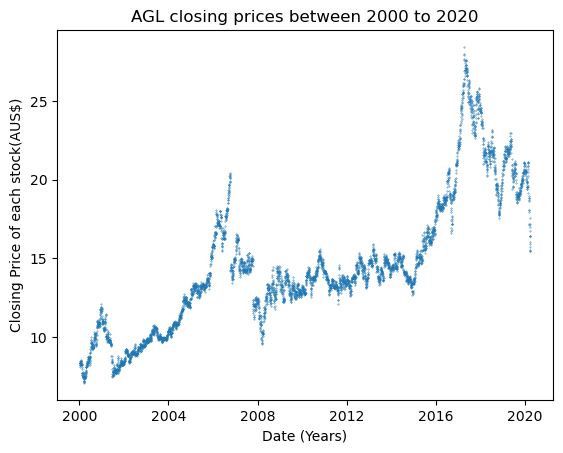

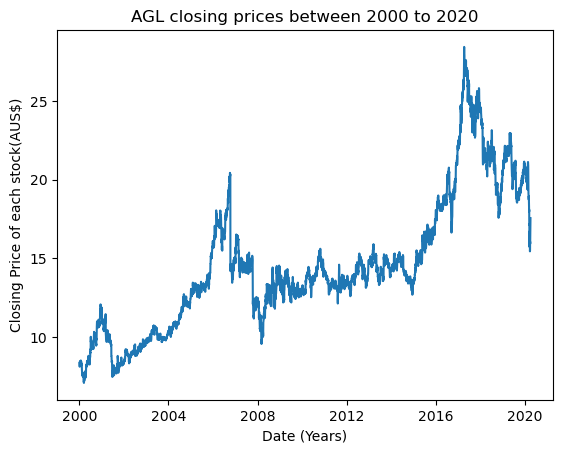

In [143]:
import matplotlib.pyplot as plt 
import datetime 
from datetime import datetime
import numpy as np 

df.iloc[0,0]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')

X = df['Date']
Y = df['Close']
plt.figure(1)
plt.scatter(df['Date'], df['Close'], s=0.1)
plt.title('AGL closing prices between 2000 to 2020')
plt.xlabel('Date (Years)')
plt.ylabel('Closing Price of each stock(AUS$)')
plt.show()

plt.figure(2)
plt.plot(df['Date'], df['Close'])
plt.title('AGL closing prices between 2000 to 2020')
plt.xlabel('Date (Years)')
plt.ylabel('Closing Price of each stock(AUS$)')
plt.show()

# Description of Time Series
(1) Long run 
(2) Continuous
(3) Periodic - if we zoom in
(4) Non-stationary 
(6) Univariate

### Estimating Density using Bins

[ 7.08755     7.30107451  7.51459902  7.72812353  7.94164804  8.15517255
  8.36869706  8.58222157  8.79574608  9.00927059  9.2227951   9.43631961
  9.64984412  9.86336863 10.07689314 10.29041765 10.50394216 10.71746667
 10.93099118 11.14451569 11.3580402  11.57156471 11.78508922 11.99861373
 12.21213824 12.42566275 12.63918726 12.85271177 13.06623628 13.27976079
 13.4932853  13.70680981 13.92033432 14.13385883 14.34738334 14.56090785
 14.77443236 14.98795687 15.20148138 15.41500589 15.6285304  15.84205491
 16.05557942 16.26910393 16.48262844 16.69615295 16.90967746 17.12320197
 17.33672648 17.55025099 17.7637755  17.97730001 18.19082452 18.40434903
 18.61787354 18.83139805 19.04492256 19.25844707 19.47197158 19.68549609
 19.8990206  20.11254511 20.32606962 20.53959413 20.75311864 20.96664315
 21.18016766 21.39369217 21.60721668 21.82074119 22.0342657  22.24779021
 22.46131472 22.67483923 22.88836374 23.10188825 23.31541276 23.52893727
 23.74246178 23.95598629 24.1695108  24.38303531 24

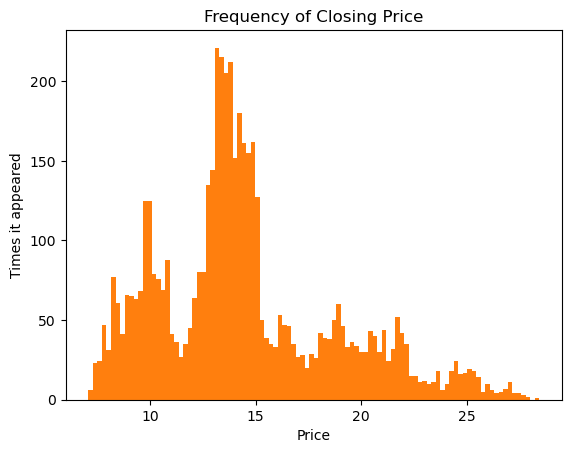

The Range of Closing Price is 7.08755 to 28.440001 
Each Bin is 0.21352450999999997 wide, assuming bins is 100


In [295]:
bin_size = 100
plt.figure(1)
arr_num = plt.hist(df['Close'], bins=bin_size)[0]
arr_bin = plt.hist(df['Close'], bins=bin_size)[1]
plt.xlabel('Price')
plt.ylabel('Times it appeared')
plt.title('Frequency of Closing Price')
plt.show()

# Finding Probaiblity 


print(f"The Range of Closing Price is {df['Close'].min()} to {df['Close'].max()} ")
print(f"Each Bin is {(df['Close'].max() - df['Close'].min()) / bin_size} wide, assuming bins is {bin_size}")

### Using MLE to find PDF using bin_size

100
101
The total probability of each bin is 1.0


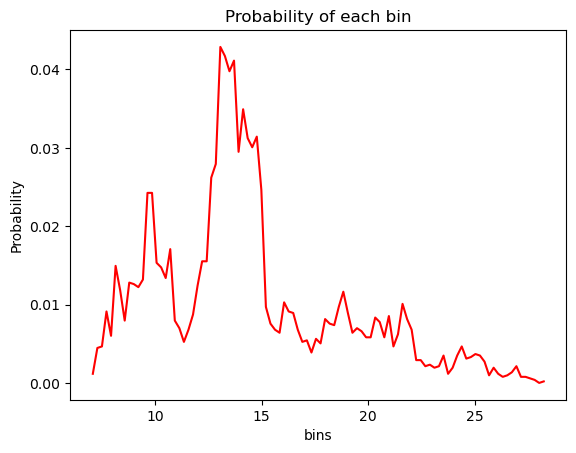

In [303]:
# Contains a list of probaiblity of each bin according to above
probability_bin_size = []

for bin_frequency in arr_num:
    probability = bin_frequency / arr_num.sum()
    #print(probability)
    probability_bin_size.append(probability)

# Check if P(all bins) = 1
total_probability_each_bin = np.array(probability_bin_size).sum()
print(f"The total probability of each bin is {total_probability_each_bin}")
x = np.arange(len(probability_bin_size))


# plot pdf of bins
plt.figure()
plt.plot(arr_bin[0:100], probability_bin_size, color='red')
plt.xlabel("bins")
plt.ylabel("Probability")
plt.title("Probability of each bin")
plt.show()

clearly, this is not normally distributed so lets do some transformations and see what happens

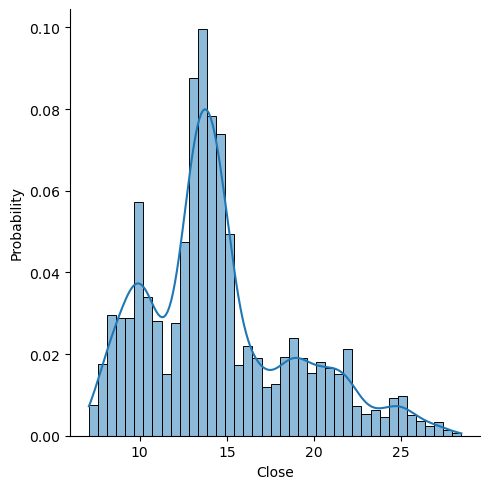

In [333]:
import seaborn as sns
sns.displot(df['Close'],stat="probability",kde=True)

# Make qqplot

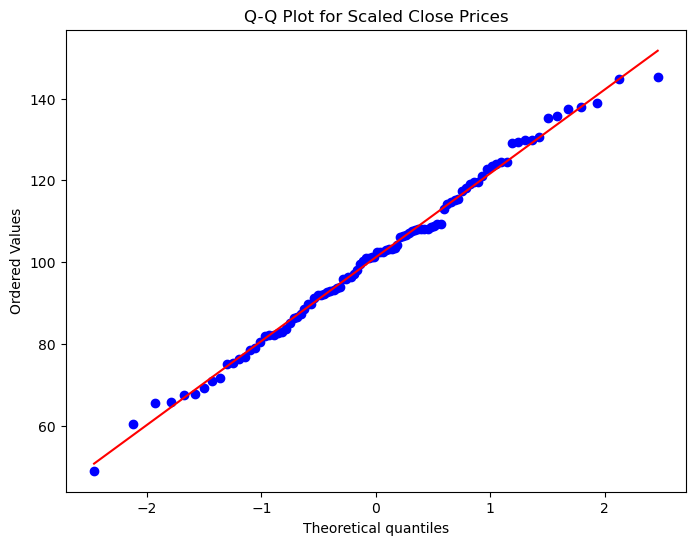

In [400]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your pandas DataFrame containing 'Close' prices
# Generate some sample data for demonstration

# Scale 'Close' prices using MinMaxScaler
scaler_min_max = MinMaxScaler()
df['Scaled_Close'] = scaler_min_max.fit_transform(df[['Close']])

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Scaled Close Prices')

plt.show()


Since it follows fairly straight we can assume it is normlly distributed.
We can confirm this by using the Shapiro–Wilk test, Lilliefors Test for Normality, Pearson's chi-squared test


# Statistical Test for normality
# Shapiro-Wilk Test

H_0 : data is normally distributed 

H_a : data is not normally distributed

# Anderson-Darling 

H_0 : data is normally distributed 

H_a : data is not normally distributed

In [430]:
from scipy import stats

# Shapiro-Wilk test
stat, p = stats.shapiro(df['Close'])

print(f"from the Shapiro Wilk test we find stat: {stat} and p-values: {p}")
print(f"Since p-value > 0.05, thus we reject our null hypothesis and conclude not normal")

# Anderson-Darling Test
res = stats.anderson(df['Close'], dist='norm')

print(res.critical_values)
print(f"Using the Anderson-Darling Test for normal distribution is should be [15%, 10%, 5%, 2.5%, 1%], but we get significant levels of {res.significance_level}")

from the Shapiro Wilk test we find stat: 0.992694081874749 and p-values: 0.868936668277495
Since p-value > 0.05, thus we reject our null hypothesis and conclude not normal
[0.555 0.632 0.759 0.885 1.053]
Using the Anderson-Darling Test for normal distribution is should be [15%, 10%, 5%, 2.5%, 1%], but we get significant levels of [15.  10.   5.   2.5  1. ]
